<a href="https://colab.research.google.com/github/davidepanzino/HPC-assignment2/blob/main/Jacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
from torch import (roll, zeros)
from google.colab import files


# Task 2.5 - PyTorch Implementation


In [2]:
# def jacobi_torch(f, device='cuda' if torch.cuda.is_available() else 'cpu'):
def jacobi_torch(f):
    newf = f.clone()
    oldf = f.clone()

    # Circular shift to the right
    right_shifted = roll(oldf, shifts=(0, 1), dims=(0, 1))

    # Circular shift to the left
    left_shifted = roll(oldf, shifts=(0, -1), dims=(0, 1))

    # Circular shift upwards
    up_shifted = roll(oldf, shifts=(-1, 0), dims=(0, 1))

    # Circular shift downwards
    down_shifted = roll(oldf, shifts=(1, 0), dims=(0, 1))

    # Update newf using roll operations
    newf[1:-1, 1:-1] = 0.25 * (right_shifted[1:-1, 1:-1] + left_shifted[1:-1, 1:-1] +
                              up_shifted[1:-1, 1:-1] + down_shifted[1:-1, 1:-1])

    return newf

Execution time with grid size equal to 3 is [0.15321898460388184] seconds
Execution time with grid size equal to 4 is [0.15518736839294434] seconds
Execution time with grid size equal to 5 is [0.1763627529144287] seconds
Execution time with grid size equal to 6 is [0.16171836853027344] seconds
Execution time with grid size equal to 7 is [0.17360472679138184] seconds
Execution time with grid size equal to 8 is [0.15781354904174805] seconds
Execution time with grid size equal to 9 is [0.16894316673278809] seconds
Execution time with grid size equal to 10 is [0.15718913078308105] seconds
Execution time with grid size equal to 11 is [0.17348456382751465] seconds
Execution time with grid size equal to 12 is [0.1591341495513916] seconds
Execution time with grid size equal to 13 is [0.1628720760345459] seconds
Execution time with grid size equal to 14 is [0.1564474105834961] seconds
Execution time with grid size equal to 15 is [0.16507911682128906] seconds
Execution time with grid size equal 

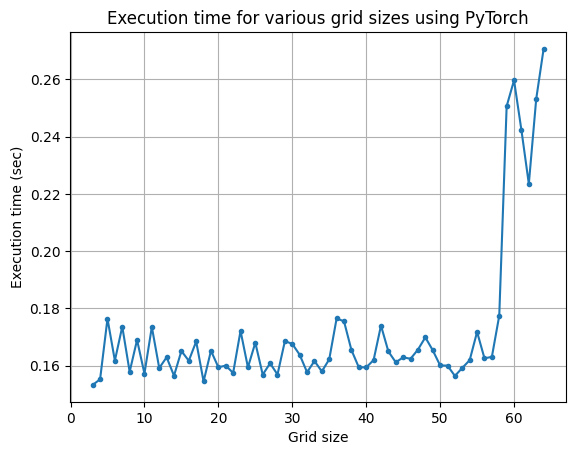

In [25]:
if __name__ == "__main__":
    exec_time_py = [[] for _ in range(62)]
    # Varying the grid size from 3 to 10
    for i, grid in enumerate(range (3, 65), start=0):
        # Create an initial grid of zeros with the specified size
        initGrid = torch.zeros(grid, grid).cuda()

        t1 = time.time()
        for j in range(1000):
            initGrid = jacobi_torch(initGrid)
        t2 = time.time()
        exec_time_py[i].append(t2 - t1)
        print(f"Execution time with grid size equal to {grid} is {exec_time_py[i]} seconds")

    grid_sizes = [g for g in range(3, 65)]
    plt.plot(grid_sizes, exec_time_py, marker='.', linestyle='-')
    plt.xlabel('Grid size')
    plt.ylabel('Execution time (sec)')
    plt.title('Execution time for various grid sizes using PyTorch')
    plt.grid(True)
    plt.show()

#Task 2.6 - CuPy Implementation

In [8]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [9]:
pip install cupy-cuda12x

In [10]:
import cupy as cp

def cupy_jacobi(f):
    newf = f.copy()
    # Circular shift to the right
    right_shifted = cp.roll(f, 1, axis=1)

    # Circular shift to the left
    left_shifted = cp.roll(f, -1, axis=1)

    # Circular shift upwards
    up_shifted = cp.roll(f, -1, axis=0)

    # Circular shift downwards
    down_shifted = cp.roll(f, 1, axis=0)

    # Update newf using roll operations
    newf[1:-1, 1:-1] = 0.25 * (right_shifted[1:-1, 1:-1] + left_shifted[1:-1, 1:-1] +
                              up_shifted[1:-1, 1:-1] + down_shifted[1:-1, 1:-1])
    cp.cuda.Stream.null.synchronize()

    return newf

Execution time with grid size equal to 3 is [0.42600297927856445] seconds
Execution time with grid size equal to 4 is [0.43589138984680176] seconds
Execution time with grid size equal to 5 is [0.4173583984375] seconds
Execution time with grid size equal to 6 is [0.4413583278656006] seconds
Execution time with grid size equal to 7 is [0.4191579818725586] seconds
Execution time with grid size equal to 8 is [0.4363517761230469] seconds
Execution time with grid size equal to 9 is [0.44051146507263184] seconds
Execution time with grid size equal to 10 is [0.4214959144592285] seconds
Execution time with grid size equal to 11 is [0.44753122329711914] seconds
Execution time with grid size equal to 12 is [0.630180835723877] seconds
Execution time with grid size equal to 13 is [0.6324777603149414] seconds
Execution time with grid size equal to 14 is [0.6504509449005127] seconds
Execution time with grid size equal to 15 is [0.42432641983032227] seconds
Execution time with grid size equal to 16 is

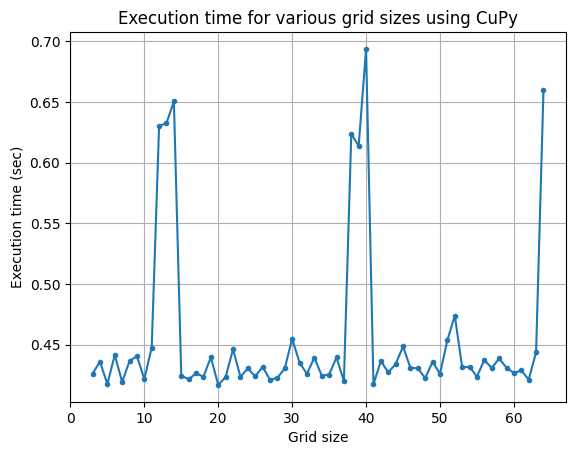

In [26]:
if __name__ == "__main__":
    exec_time_cu = [[] for _ in range(62)]
    # Varying the grid size from 3 to 10
    for i, grid in enumerate(range (3, 65), start=0):
        # Create an initial grid of zeros with the specified size
        f_np = np.zeros((grid, grid))
        # Transfer data to GPU
        initGrid = cp.asarray(f_np)

        t1 = time.time()
        for j in range(1000):
            initGrid = cupy_jacobi(initGrid)
        t2 = time.time()
        exec_time_cu[i].append(t2 - t1)
        print(f"Execution time with grid size equal to {grid} is {exec_time_cu[i]} seconds")

    grid_sizes = [g for g in range(3, 65)]
    plt.plot(grid_sizes, exec_time_cu, marker='.', linestyle='-')
    plt.xlabel('Grid size')
    plt.ylabel('Execution time (sec)')
    plt.title('Execution time for various grid sizes using CuPy')
    plt.grid(True)
    plt.show()

#Task 2.7 - Comparison of the different methods

In [13]:
def jacobi(f):
    newf = f.copy()
    for i in range(1, newf.shape[0]-1):
        for j in range(1, newf.shape[1]-1):
            newf[i, j] = 0.25 * (f[i, j+1] + f[i, j-1] + f[i+1, j] + f[i-1, j])
    return newf

Execution time with grid size equal to 3 is [0.0047686100006103516] seconds
Execution time with grid size equal to 4 is [0.006357669830322266] seconds
Execution time with grid size equal to 5 is [0.010751008987426758] seconds
Execution time with grid size equal to 6 is [0.11502218246459961] seconds
Execution time with grid size equal to 7 is [0.159867525100708] seconds
Execution time with grid size equal to 8 is [0.10021710395812988] seconds
Execution time with grid size equal to 9 is [0.10567736625671387] seconds
Execution time with grid size equal to 10 is [0.10291910171508789] seconds
Execution time with grid size equal to 11 is [0.0926809310913086] seconds
Execution time with grid size equal to 12 is [0.13729047775268555] seconds
Execution time with grid size equal to 13 is [0.1318347454071045] seconds
Execution time with grid size equal to 14 is [0.47542595863342285] seconds
Execution time with grid size equal to 15 is [0.20159554481506348] seconds
Execution time with grid size eq

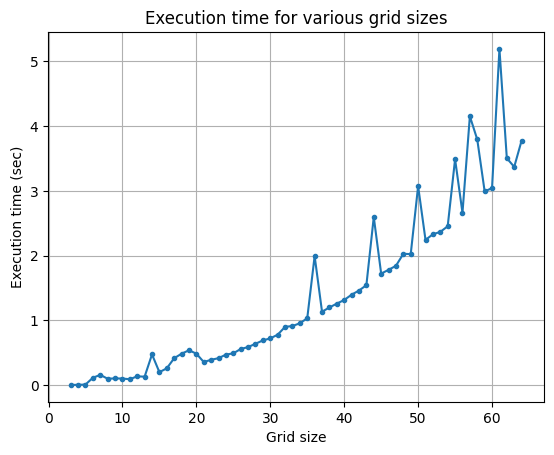

In [27]:
if __name__ == "__main__":
    exec_time = [[] for _ in range(62)]
    # Varying the grid size from 3 to 10
    for i, grid in enumerate(range (3, 65), start=0):
        # Create an initial grid of zeros with the specified size
        initGrid = np.zeros((grid, grid))

        t1 = time.time()
        for j in range(1000):
            initGrid = jacobi(initGrid)
        t2 = time.time()
        exec_time[i].append(t2 - t1)
        print(f"Execution time with grid size equal to {grid} is {exec_time[i]} seconds")

    grid_sizes = [g for g in range(3, 65)]
    plt.plot(grid_sizes, exec_time, marker='.', linestyle='-')
    plt.xlabel('Grid size')
    plt.ylabel('Execution time (sec)')
    plt.title('Execution time for various grid sizes')
    plt.grid(True)
    plt.show()

In [18]:
print(len(exec_time))
print(len(exec_time_cu))
print(len(exec_time_py))

62
62
62


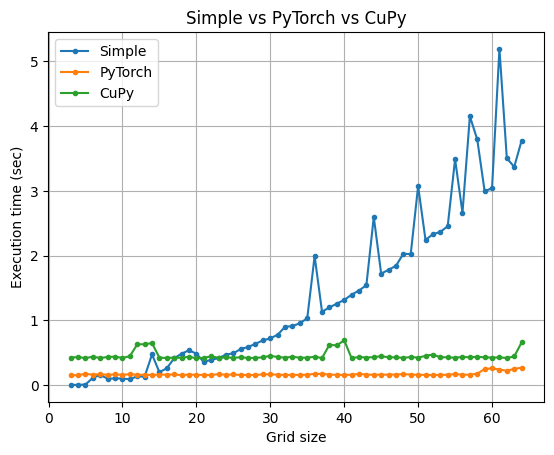

In [29]:
import matplotlib.pyplot as plt

grid_sizes = [g for g in range(3, 65)]

plt.plot(grid_sizes, exec_time, marker='.', linestyle='-', label='Simple')
plt.plot(grid_sizes, exec_time_py, marker='.', linestyle='-', label='PyTorch')
plt.plot(grid_sizes, exec_time_cu, marker='.', linestyle='-', label='CuPy')

plt.xlabel('Grid size')
plt.ylabel('Execution time (sec)')
plt.title('Simple vs PyTorch vs CuPy')
plt.grid(True)
plt.legend()

plt.show()


#Task 2.8 - Save the matrix using h5py

In [32]:
import h5py

newgrid_simple = initGrid

hdf5_file_path = 'simple_newgrid.h5'

with h5py.File(hdf5_file_path, 'w') as hdf5_file:
    hdf5_file.create_dataset('newgrid_simple', data=newgrid_simple)

print(f'Array saved to {hdf5_file_path}')

Array saved to simple_newgrid.h5
